In [6]:
# load irish dataset with pandas
import pandas as pd
from sklearn.model_selection import train_test_split

# load dataset
data = pd.read_csv('iris.csv')

data.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
X = data.drop(columns='variety')
y = data['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

iris_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
iris_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
from sklearn.tree import export_text
feature_names = X.columns 
tree_rules = export_text(iris_clf,feature_names = list(feature_names))
print(tree_rules)

|--- petal.length <= 2.45
|   |--- class: Setosa
|--- petal.length >  2.45
|   |--- petal.width <= 1.75
|   |   |--- petal.length <= 5.35
|   |   |   |--- class: Versicolor
|   |   |--- petal.length >  5.35
|   |   |   |--- class: Virginica
|   |--- petal.width >  1.75
|   |   |--- petal.length <= 4.85
|   |   |   |--- class: Virginica
|   |   |--- petal.length >  4.85
|   |   |   |--- class: Virginica



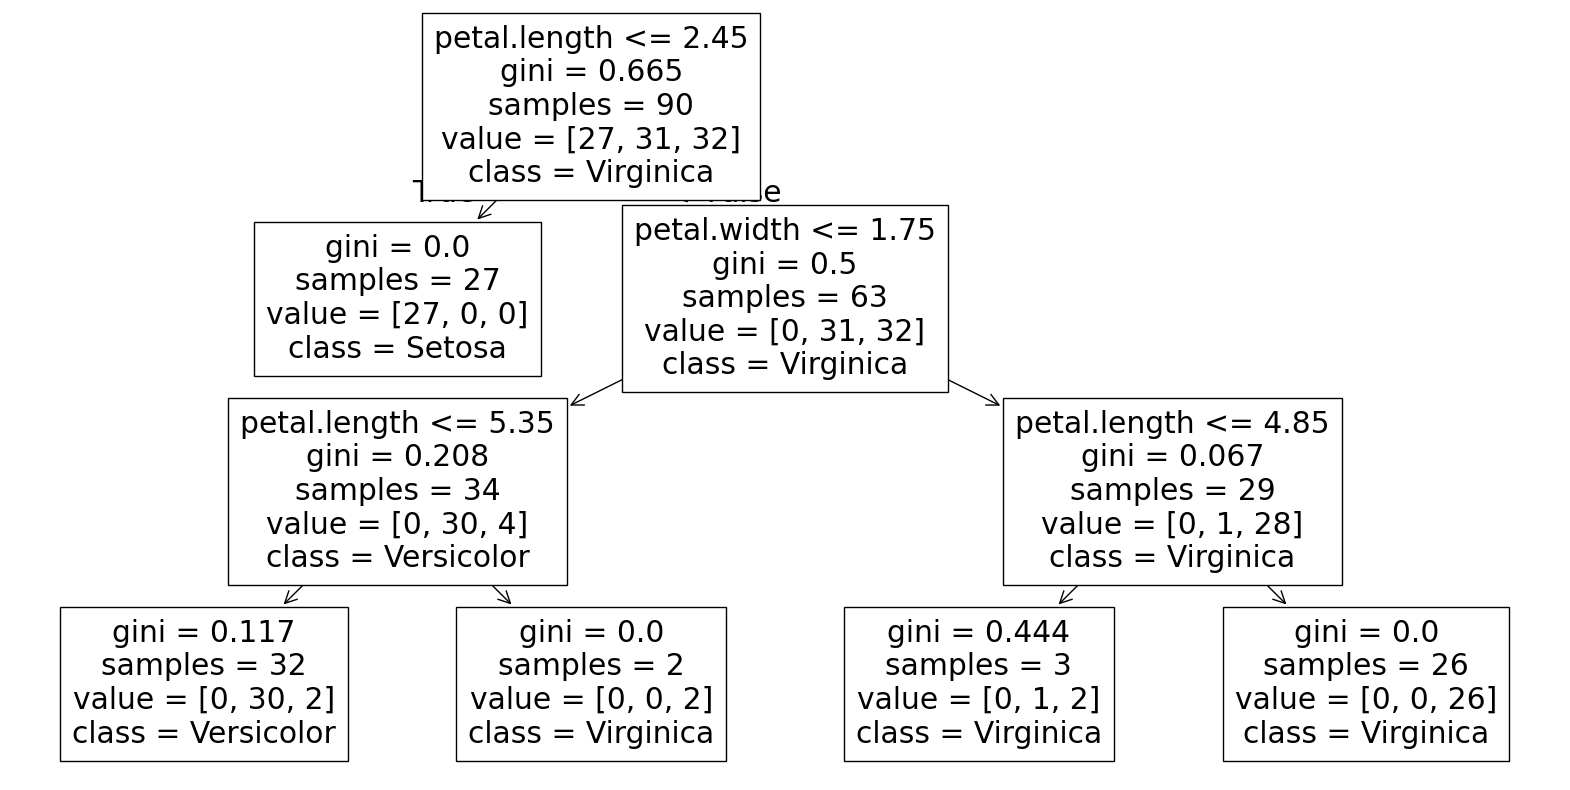

In [12]:
from sklearn import tree 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
a = tree.plot_tree(iris_clf, feature_names = feature_names,
class_names = y.unique())
plt.show()



In [14]:
y_pred = iris_clf.predict(X_test) 
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor'], dtype=object)

In [15]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


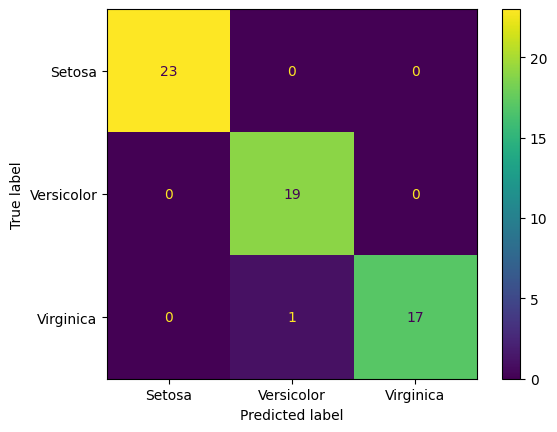

In [18]:
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = y.unique()) 
cm_display.plot() 
plt.grid(False)
plt.show()